# 1- Exploratory data analysis of the 'bank-full.csv' data as is -                               prior to any changes
## 1.1. Non visual analysis
Comments will follow to set a path on how to make necesseary changes that will be implemented in part 2

In [254]:
# importing EDA librabries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [255]:
# loading the data into the dataframe TDS ( Term Deposit Sale)
TDS = pd.read_csv('bank-full.csv')

In [256]:
TDS.head(100)

# first impression : many of the 16 attributes are categorical 
# and will require transformation to ordinal level or using dummy variables.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
97,60,retired,married,tertiary,no,81,yes,no,unknown,5,may,101,1,-1,0,unknown,no
98,39,technician,married,secondary,no,0,yes,no,unknown,5,may,203,1,-1,0,unknown,no


In [257]:
# column names
TDS.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [258]:
# data size and shape
TDS.shape

(45211, 17)

In [259]:
# dtypes of the attributes columns
TDS.dtypes

# confirmation that many attributes are of type: 'object' --> to be transformed later

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [260]:
TDS.info()
# NO missing values however some surprises could be expected that may require replacement(s) later on.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [261]:
# statistical analysis of the numerical attributes
TDS.describe().transpose()

# attributes where [ mean is quite > than median ] is an indicator of strong right skewness; 
# and presence of outliers in the respective distributions is also confirmed by the (max/min) values.

# this is observed for : 'balance' , 'duration' , 'campaign', 'pdays', 'previous'



,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [262]:
# confirming our hunch about the data by printing the values counts of all columns/attributes.

for column in TDS.columns:
    print(TDS[column].value_counts(), '\n')


32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int6

Before jumping to graphical univariate analysis , some important peliminary observations on the distributions of some attributes. 

1 -  'Target' :   is tilted largely towards 'no'. (so the chances of guessing by chance are not 50 - 50)
     
2 -  'poutcome':  shows that clients labeled as 'unknown' are = 36959

3 -  'pdays'   :  shows that clients labeled as '-1' = 36954

This seems to confirm that previously uncontacted clients amoun to approx. 36950.

4 -  'previous':  shows strong right skweness and an outlier '275' 

5 -  'campaign':  shows strong right skewness and an outlier '63' 



## 1.2. Univariate Graphical analysis column by column.

In [263]:
TDS.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

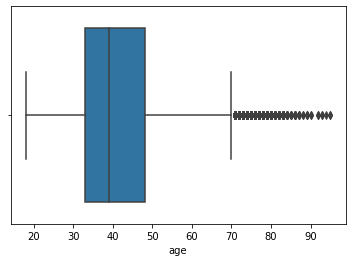

In [264]:
# plotting the distributions of All 17 columns. 

sns.boxplot(TDS.age)

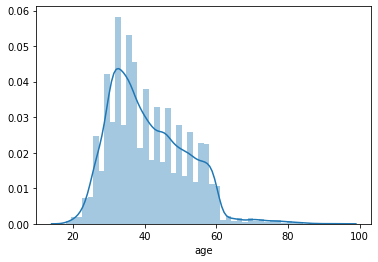

In [265]:
sns.distplot(TDS.age)
# boxplot for 'age' - a big drop after 60.

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

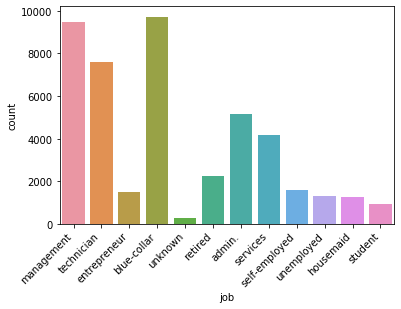

In [266]:
sns.countplot(TDS.job)
plt.xticks(rotation=45, horizontalalignment='right')

# 'unknown' category could be dropped as it gives no insight into classifying clients and is minimal in count.
TDS.job.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

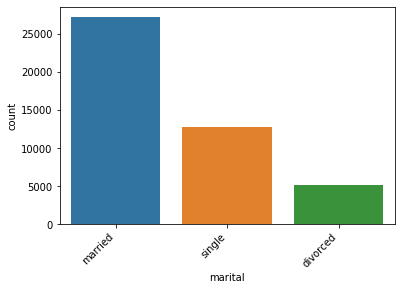

In [267]:
sns.countplot(TDS.marital)
plt.xticks(rotation=45, horizontalalignment='right')

# majority of our pool are 'married'
TDS.marital.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

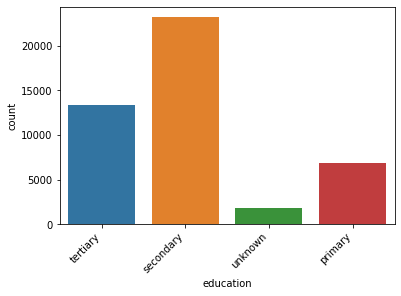

In [268]:
sns.countplot(TDS.education)
plt.xticks(rotation=45, horizontalalignment='right')

# 'unknown' education label is a flag for later analysis
TDS.education.value_counts()

no     44396
yes      815
Name: default, dtype: int64

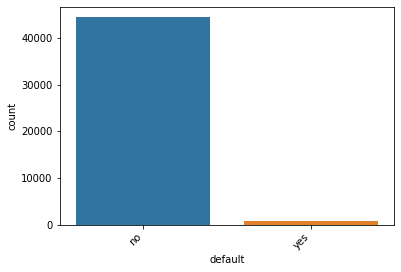

In [269]:
sns.countplot(TDS.default)
plt.xticks(rotation=45, horizontalalignment='right')

# imbalance : the Big majority have not defaulted. There are no unknowns.
TDS.default.value_counts()

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]), <a list of 8 Text xticklabel objects>)

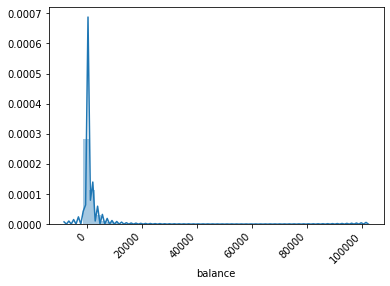

In [270]:
sns.distplot(TDS.balance)
plt.xticks(rotation=45, horizontalalignment='right')

# outliers could be those clients with balance above 20,000.

yes    25130
no     20081
Name: housing, dtype: int64

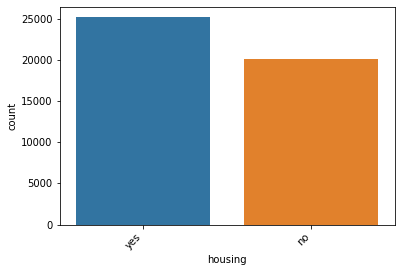

In [271]:
sns.countplot(TDS.housing)
plt.xticks(rotation=45, horizontalalignment='right')

# no strong influence expected from housing loans as it is roughly balanced in our pool
TDS.housing.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

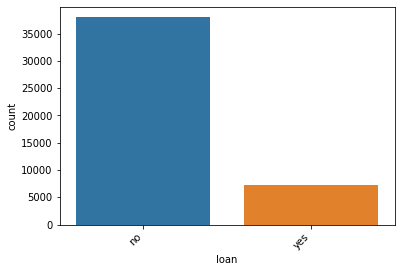

In [272]:
sns.countplot(TDS.loan)
plt.xticks(rotation=45, horizontalalignment='right')

# Majority do not have personal loans
TDS.loan.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

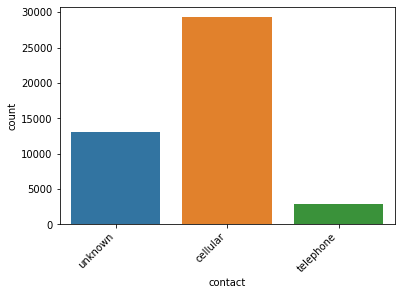

In [273]:
sns.countplot(TDS.contact)
plt.xticks(rotation=45, horizontalalignment='right')

# Majority have cell phones
# Unknows will be flagged for later consideration
TDS.contact.value_counts()

'\n23     939\n22     905\n25     840\n31     643\n10     524\n24     447\n1      322\n'

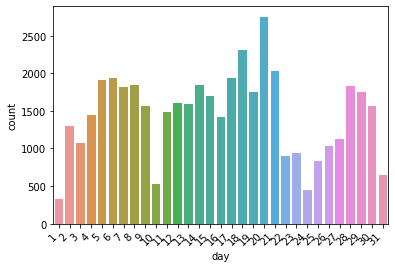

In [274]:
sns.countplot(TDS.day)
plt.xticks(rotation=45, horizontalalignment='right')


# the day of the month is not equiprobable but spreadout. Pyschological factors at play ?
# few days of the month seem to be lower than others:
'''
23     939
22     905
25     840
31     643
10     524
24     447
1      322
'''


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

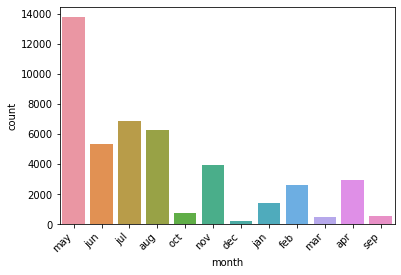

In [275]:
sns.countplot(TDS.month)
plt.xticks(rotation=45, horizontalalignment='right')

# Obviously some months are more active than others for contacts with clients. 
# Maybe it is a limited promotional timing that was mainly launched in May. 
TDS.month.value_counts()

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 <a list of 8 Text xticklabel objects>)

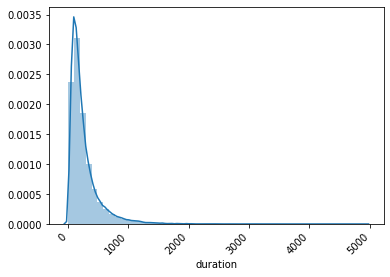

In [276]:
sns.distplot(TDS.duration)
plt.xticks(rotation=45, horizontalalignment='right')

# A right skewed distrubution with many outliers, most calls are below 1000 seconds in length.
# but it was mentionned that it's preferable to drop it out of the model later on.
# It could be that the longest calls resulted in positive outcomes for TDS so we cannot make a cutoff .

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text xticklabel objects>)

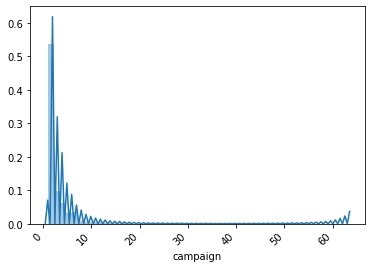

In [277]:
sns.distplot(TDS.campaign)
plt.xticks(rotation=45, horizontalalignment='right')

# also 'campaign' very right skewed and could be correlated with 'duration'


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

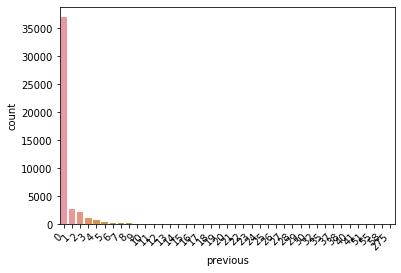

In [278]:
sns.countplot(TDS.previous)
plt.xticks(rotation=45, horizontalalignment='right')

# also 'previous' campaign very right skewed and could be correlated with 'duration'


-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

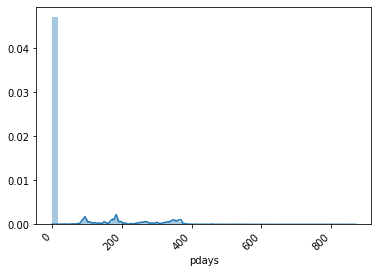

In [279]:
sns.distplot(TDS.pdays)
plt.xticks(rotation=45, horizontalalignment='right')

# '-1' is the majority who were not contacted
TDS.pdays.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

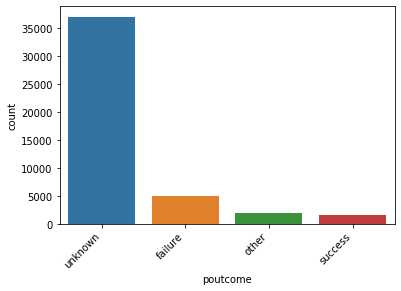

In [280]:
sns.countplot(TDS.poutcome)
plt.xticks(rotation=45, horizontalalignment='right')

# 'unknown' is the majority who were not contacted in the previous campaign. correltaed with the '-1' value above.
TDS.poutcome.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

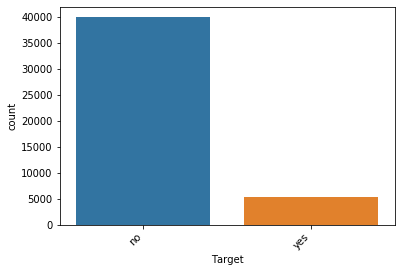

In [281]:
sns.countplot(TDS.Target)
plt.xticks(rotation=45, horizontalalignment='right')

#  vast majority did not subscribe. Is it due to failure of being contact in a previous campaign ?
TDS.Target.value_counts()

# 2- Preparing Data for Analytics

 Transforming attributes that are object or categorical and then proceed with joinplots to explore correlations

In [282]:
TDS.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [283]:
# transforming object types columns into categorical

for column in TDS.columns: 
    if TDS[column].dtype == 'object': 
        TDS[column] = pd.Categorical(TDS[column])
        


In [284]:
TDS.dtypes 
# :-)

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [327]:
# now we have to use One-Hot encoding  for the columns: 'job' , 'marital', 'month'.
TDS_dummmies = pd.get_dummies(TDS, columns= ['job' , 'marital', 'month'])

TDS_dummies.head()

,age,education,default,balance,housing,loan,contact,day,duration,campaign,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,tertiary,no,2143,yes,no,unknown,5,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,secondary,no,29,yes,no,unknown,5,151,1,...,0,0,0,0,0,0,1,0,0,0
2,33,secondary,no,2,yes,yes,unknown,5,76,1,...,0,0,0,0,0,0,1,0,0,0
3,47,unknown,no,1506,yes,no,unknown,5,92,1,...,0,0,0,0,0,0,1,0,0,0
4,33,unknown,no,1,no,no,unknown,5,198,1,...,0,0,0,0,0,0,1,0,0,0


In [348]:
TDS_dummies.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [349]:
# Changing remaining categorical columns into ordinal scale & Creating new DF : TDS_dummies_repl

replaceStruct = {
                'education': {'unknown': 0, 'primary': 1 ,'secondary': 2 ,'tertiary':3},
                'default'  : {'yes': 0, 'no':1 }, 
                             # defaulting is not a good indicator hence 'yes' --> 0
                'housing'  : {'no':1 , 'yes':0},
                'loan'     : {'no':1 , 'yes':0},
                'contact'  : {'unknown':0, 'telephone':1, 'cellular':2},
                'poutcome' : {'failure':-1,'unknown':0,'other':0, 'success':1}, 
                             # unknown and other considered same neutral level
                'Target'   : {'no':0 , 'yes':1},
                             # unknown and other considered same neutral level
                'pdays'    : {-1: 999} 
                             #replacing -1 by 999 to show that client was never contacted
                }
TDS_dummies_repl = TDS_dummies.replace(replaceStruct)

TDS_dummies_repl.head()

# All columns are numerical now :-) and hence correlations are possible!

,age,education,default,balance,housing,loan,contact,day,duration,campaign,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,1,2143,0,1,0,5,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,2,1,29,0,1,0,5,151,1,...,0,0,0,0,0,0,1,0,0,0
2,33,2,1,2,0,0,0,5,76,1,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1,1506,0,1,0,5,92,1,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,1,1,1,0,5,198,1,...,0,0,0,0,0,0,1,0,0,0


In [331]:
TDS_dummies_repl.Target.value_counts()


0    39922
1     5289
Name: Target, dtype: int64

In [332]:
# SCALING numerical columns: age, balance, duration, campaign, pdays, previous

for col in TDS_dummies_repl.columns:
    
    if col   == 'age' :
        TDS_dummies_repl[col] = TDS_dummies_repl[col]/(TDS_dummies_repl[col].max())
    elif col =='balance': 
        TDS_dummies_repl[col] = TDS_dummies_repl[col]/(TDS_dummies_repl[col].max())
    elif col =='duration': 
        TDS_dummies_repl[col] = TDS_dummies_repl[col]/(TDS_dummies_repl[col].max())
    elif col =='campaign': 
        TDS_dummies_repl[col] = TDS_dummies_repl[col]/(TDS_dummies_repl[col].max())
    elif col == 'pdays': 
        TDS_dummies_repl[col] = TDS_dummies_repl[col]/(TDS_dummies_repl[col].max())
    elif col =='previous': 
        TDS_dummies_repl[col] = TDS_dummies_repl[col]/(TDS_dummies_repl[col].max())
        
TDS_dummies_repl.head()

,age,education,default,balance,housing,loan,contact,day,duration,campaign,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.610526,3,1,0.020984,0,1,0,5,0.053070,0.015873,...,0,0,0,0,0,0,1,0,0,0
1,0.463158,2,1,0.000284,0,1,0,5,0.030704,0.015873,...,0,0,0,0,0,0,1,0,0,0
2,0.347368,2,1,0.000020,0,0,0,5,0.015453,0.015873,...,0,0,0,0,0,0,1,0,0,0
3,0.494737,0,1,0.014746,0,1,0,5,0.018707,0.015873,...,0,0,0,0,0,0,1,0,0,0
4,0.347368,0,1,0.000010,1,1,0,5,0.040260,0.015873,...,0,0,0,0,0,0,1,0,0,0


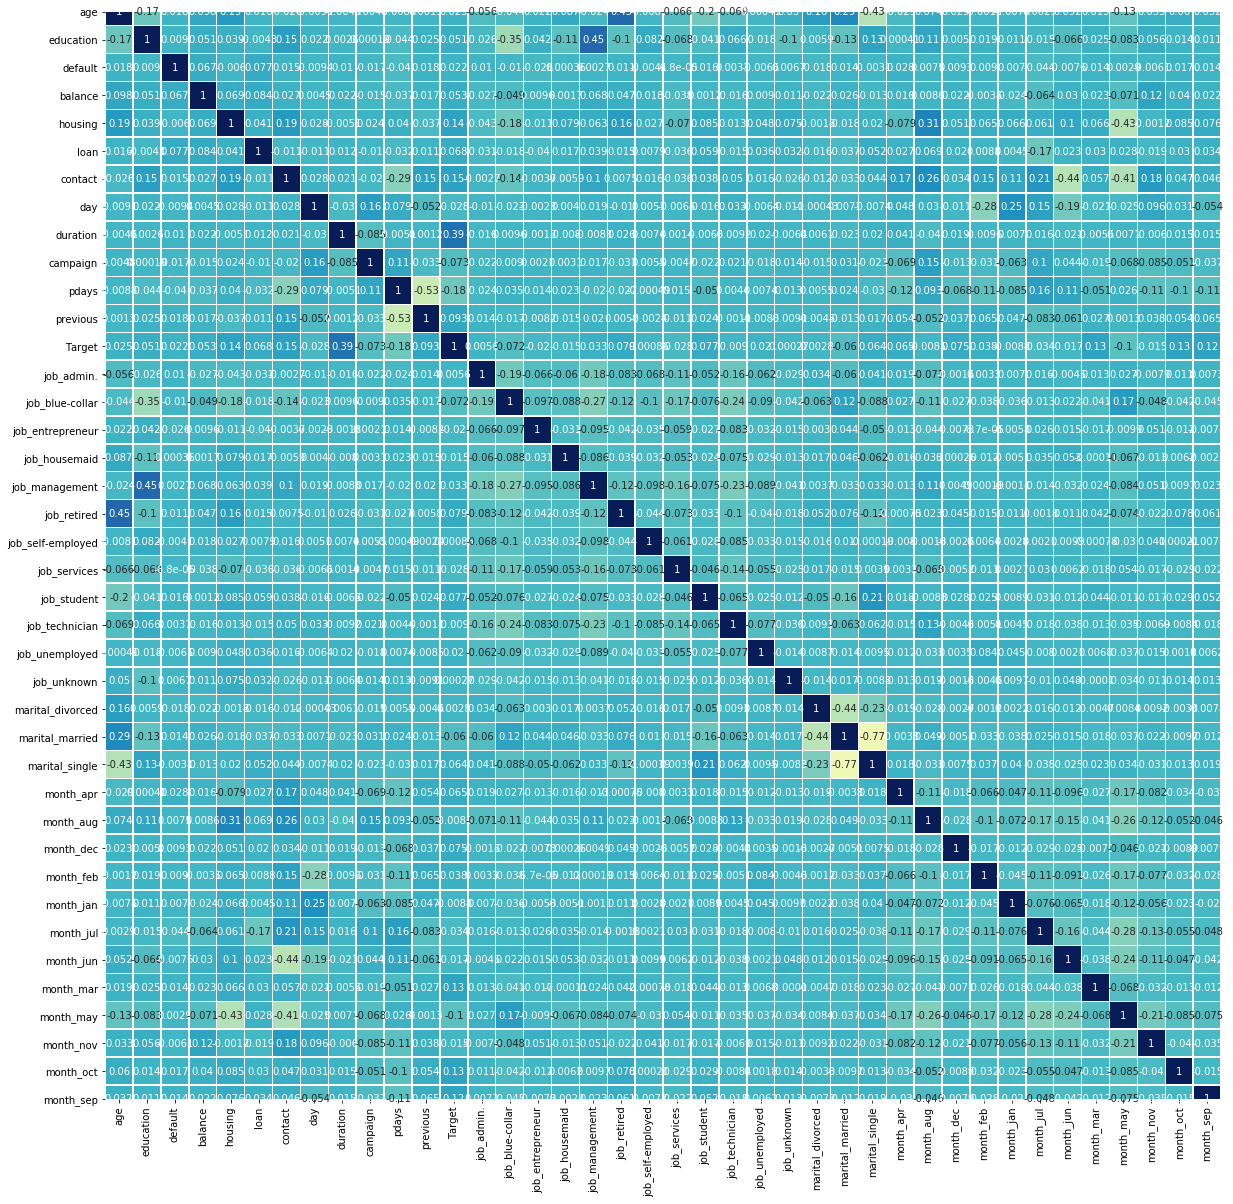

In [311]:
plt.figure(figsize=(20,20))

sns.heatmap( TDS_dummies_repl.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

# NO Obvious Proxies with a correlation > 0.9 !

In [1]:
# NOTE : tried sns.pairplot( TDS_dummies_repl ) ... it was too computationally heavy. 
#couldn't get graphical resuts


# 3 and 4 - DT and Ensemble Models and comparison of performance 

In [368]:
# Importing the needed sklearn packages 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from sklearn.tree     import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [350]:
TDS_dummies_repl.info()

# all columns are numerical types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
age                  45211 non-null int64
education            45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
contact              45211 non-null int64
day                  45211 non-null int64
duration             45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
poutcome             45211 non-null int64
Target               45211 non-null int64
job_admin.           45211 non-null uint8
job_blue-collar      45211 non-null uint8
job_entrepreneur     45211 non-null uint8
job_housemaid        45211 non-null uint8
job_management       45211 non-null uint8
job_retired          45211 non-null uint8
job_self-employed    45211 non-null uint8
job_servi

## 3.1 split data 

In [399]:
X = TDS_dummies_repl.drop( ["Target","duration"], axis=1)
y = TDS_dummies_repl.Target


In [400]:
print(X.shape)
print(y.shape)

(45211, 39)
(45211,)


In [441]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=.30, random_state=1)

print(X_test.shape)
print(y_test.shape)

(13564, 39)
(13564,)


## 3.2 Decision Tree model using GINI criteria 

In [402]:
dTree_Gini= DecisionTreeClassifier(criterion = 'gini', random_state=1)

dTree_Gini.fit(X_train, y_train)

print(dTree_Gini.score(X_train, y_train))
print(dTree_Gini.score(X_test, y_test))

# The expected overfitting is there with the training Data

1.0
0.8352255971689767


In [461]:
y_pred_G = dTree_Gini.predict(X_test)

# CONFUSION matrix
cm = metrics.confusion_matrix(y_test, y_pred_G, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                       columns = [i for i in ["No","Yes"]])

df_cm



,No,Yes
No,10787,1226
Yes,1009,542


In [462]:
print(' Accuracy - Recall - Precision scores respectively: ')
print(metrics.accuracy_score(y_test, y_pred_G))
print(metrics.recall_score(y_test, y_pred_G))
print(metrics.precision_score(y_test, y_pred_G))

 Accuracy - Recall - Precision scores respectively: 
0.8352255971689767
0.34945196647324306
0.3065610859728507


In [404]:
print (pd.DataFrame(dTree_Gini.feature_importances_, columns = ["Imp"], index = X_train.columns))

# 'balance', 'age, 'day'  seems to be the most important features

                        Imp
age                0.143323
education          0.031835
default            0.002503
balance            0.204176
housing            0.024161
loan               0.012849
contact            0.013699
day                0.120806
campaign           0.054560
pdays              0.046922
previous           0.024002
poutcome           0.098443
job_admin.         0.010719
job_blue-collar    0.012416
job_entrepreneur   0.004377
job_housemaid      0.004178
job_management     0.013014
job_retired        0.005220
job_self-employed  0.006320
job_services       0.010259
job_student        0.005797
job_technician     0.017345
job_unemployed     0.006367
job_unknown        0.000862
marital_divorced   0.005912
marital_married    0.009750
marital_single     0.007906
month_apr          0.007355
month_aug          0.009540
month_dec          0.004198
month_feb          0.009696
month_jan          0.004449
month_jul          0.007358
month_jun          0.012728
month_mar          0

## 3.3 Decision Tree model using GINI criteria and depth = 4 ( Pruning )

In [463]:
dTree_Gini_4= DecisionTreeClassifier(criterion = 'gini', max_depth=4 ,random_state=1)

dTree_Gini_4.fit(X_train, y_train)

print(dTree_Gini_4.score(X_train, y_train))
print(dTree_Gini_4.score(X_test, y_test))

# Testing results are much better than without pruning

0.8942395803709672
0.8951636685343557


In [464]:
y_pred_G4 = dTree_Gini_4.predict(X_test)

# CONFUSION matrix

cm = metrics.confusion_matrix(y_test, y_pred_G4, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                       columns = [i for i in ["No","Yes"]])

df_cm

,No,Yes
No,11828,185
Yes,1237,314


In [465]:
print(' Accuracy - Recall - Precision scores respectively: ')
print(metrics.accuracy_score(y_test, y_pred_G4))
print(metrics.recall_score(y_test, y_pred_G4))
print(metrics.precision_score(y_test, y_pred_G4))

 Accuracy - Recall - Precision scores respectively: 
0.8951636685343557
0.2024500322372663
0.6292585170340681


In [419]:
print (pd.DataFrame(dTree_Gini_4.feature_importances_, columns = ["Imp"], index = X_train.columns))

# 'poutcome' seems to be the most important feature by large!

                        Imp
age                0.110006
education          0.000000
default            0.000000
balance            0.000000
housing            0.016810
loan               0.000000
contact            0.000000
day                0.024734
campaign           0.002670
pdays              0.016754
previous           0.000000
poutcome           0.661688
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.002572
job_unemployed     0.000000
job_unknown        0.000000
marital_divorced   0.004168
marital_married    0.000000
marital_single     0.000000
month_apr          0.000000
month_aug          0.000000
month_dec          0.004339
month_feb          0.000000
month_jan          0.000000
month_jul          0.000000
month_jun          0.000000
month_mar          0

## 3.4 Decision Tree model using  Entropy criteria 

In [475]:
dTree_Entropy= DecisionTreeClassifier(criterion = 'entropy' ,random_state=1)

dTree_Entropy.fit(X_train, y_train)

print(dTree_Entropy.score(X_train, y_train))
print(dTree_Entropy.score(X_test, y_test))

# Overfitting expected with training data

1.0
0.8347095252138013


In [476]:
y_pred_E= dTree_Entropy.predict(X_test)

# CONFUSION matrix

cm = metrics.confusion_matrix(y_test, y_pred_E, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                       columns = [i for i in ["No","Yes"]])

df_cm

,No,Yes
No,10828,1185
Yes,1057,494


In [477]:
print(' Accuracy - Recall - Precision scores respectively: ')
print(metrics.accuracy_score(y_test, y_pred_E))
print(metrics.recall_score(y_test, y_pred_E))
print(metrics.precision_score(y_test, y_pred_E))

 Accuracy - Recall - Precision scores respectively: 
0.8347095252138013
0.3185041908446164
0.2942227516378797


In [422]:
print (pd.DataFrame(dTree_Entropy.feature_importances_, columns = ["Imp"], index = X_train.columns))

# 'balance', 'age' , 'day' seem to be the most important features

                        Imp
age                0.144494
education          0.036393
default            0.002601
balance            0.219630
housing            0.016815
loan               0.013681
contact            0.030039
day                0.112352
campaign           0.059784
pdays              0.046608
previous           0.019791
poutcome           0.081725
job_admin.         0.013046
job_blue-collar    0.015027
job_entrepreneur   0.004365
job_housemaid      0.002829
job_management     0.013128
job_retired        0.003448
job_self-employed  0.006259
job_services       0.010182
job_student        0.003707
job_technician     0.011517
job_unemployed     0.005701
job_unknown        0.002033
marital_divorced   0.007445
marital_married    0.009797
marital_single     0.008096
month_apr          0.012160
month_aug          0.007104
month_dec          0.003841
month_feb          0.008604
month_jan          0.004092
month_jul          0.006509
month_jun          0.011545
month_mar          0

## 3.5 Decision Tree model using Entropy criteria and depth = 4 ( Pruning )

In [423]:
dTree_Entropy_4= DecisionTreeClassifier(criterion = 'entropy', max_depth=4 ,random_state=1)

dTree_Entropy_4.fit(X_train, y_train)

print(dTree_Entropy_4.score(X_train, y_train))
print(dTree_Entropy_4.score(X_test, y_test))

# Testing results are much better than without pruning

0.8927228489272285
0.8956797404895311


In [478]:
y_pred_E4 = dTree_Entropy_4.predict(X_test)

# CONFUSION matrix

cm = metrics.confusion_matrix(y_test, y_pred_E4, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                       columns = [i for i in ["No","Yes"]])

df_cm

,No,Yes
No,11866,147
Yes,1268,283


In [479]:
print(' Accuracy - Recall - Precision scores respectively: ')
print(metrics.accuracy_score(y_test, y_pred_E4))
print(metrics.recall_score(y_test, y_pred_E4))
print(metrics.precision_score(y_test, y_pred_E4))

 Accuracy - Recall - Precision scores respectively: 
0.8956797404895311
0.1824629271437782
0.6581395348837209


In [425]:
print (pd.DataFrame(dTree_Entropy_4.feature_importances_, columns = ["Imp"], index = X_train.columns))

# 'poutcome' seems to be the most important feature by far

                        Imp
age                0.096045
education          0.000000
default            0.000000
balance            0.000000
housing            0.011200
loan               0.000000
contact            0.184645
day                0.014742
campaign           0.000000
pdays              0.009188
previous           0.000000
poutcome           0.584279
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.002000
job_unemployed     0.000000
job_unknown        0.000000
marital_divorced   0.000000
marital_married    0.008561
marital_single     0.000000
month_apr          0.000000
month_aug          0.000000
month_dec          0.000000
month_feb          0.000000
month_jan          0.000000
month_jul          0.000000
month_jun          0.074695
month_mar          0

# Ensemble Methods

## 3.6 Random Forest model 

In [471]:

RFcl = RandomForestClassifier(n_estimators = 10, random_state=1,max_features=12)
RFcl = RFcl.fit(X_train, y_train)

print(RFcl.score(X_train, y_train))
print(RFcl.score(X_test, y_test))


0.9855594527127374
0.8913299911530522


In [472]:
y_pred_RF = RFcl.predict(X_test)

# CONFUSION matrix

cm = metrics.confusion_matrix(y_test, y_pred_RF, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                       columns = [i for i in ["No","Yes"]])

df_cm

,No,Yes
No,11746,267
Yes,1207,344


In [473]:
print(' Accuracy - Recall - Precision scores respectively: ')
print(metrics.accuracy_score(y_test, y_pred_RF))
print(metrics.recall_score(y_test, y_pred_RF))
print(metrics.precision_score(y_test, y_pred_RF))

 Accuracy - Recall - Precision scores respectively: 
0.8913299911530522
0.22179239200515796
0.563011456628478


## 3.7 Adaboost Ensemble model

In [468]:
ADcl = AdaBoostClassifier(n_estimators=10, random_state=1)

ADcl = ADcl.fit(X_train, y_train)

print(ADcl.score(X_train, y_train))
print(ADcl.score(X_test, y_test))

0.8912061174834898
0.8942789737540549


In [469]:
y_pred_AD = ADcl.predict(X_test)

# CONFUSION matrix

cm = metrics.confusion_matrix(y_test, y_pred_AD, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                       columns = [i for i in ["No","Yes"]])

df_cm

,No,Yes
No,11809,204
Yes,1230,321


In [470]:
print(' Accuracy - Recall - Precision scores respectively: ')
print(metrics.accuracy_score(y_test, y_pred_AD))
print(metrics.recall_score(y_test, y_pred_AD))
print(metrics.precision_score(y_test, y_pred_AD))

 Accuracy - Recall - Precision scores respectively: 
0.8942789737540549
0.20696324951644102
0.6114285714285714


## 3.7 Bagging Ensemble model

In [449]:
BGcl = BaggingClassifier(n_estimators=10,random_state=1)

BGcl = BGcl.fit(X_train, y_train)

print(BGcl.score(X_train, y_train))
print(BGcl.score(X_test, y_test))

0.9857174455714601
0.8900766735476261


In [466]:
y_pred_BG = bgcl.predict(X_test)

# CONFUSION matrix

cm = metrics.confusion_matrix(y_test, y_pred_BG, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                       columns = [i for i in ["No","Yes"]])

df_cm

,No,Yes
No,11696,317
Yes,1174,377


In [467]:
print(' Accuracy - Recall - Precision scores respectively: ')
print(metrics.accuracy_score(y_test, y_pred_BG))
print(metrics.recall_score(y_test, y_pred_BG))
print(metrics.precision_score(y_test, y_pred_BG))

 Accuracy - Recall - Precision scores respectively: 
0.8900766735476261
0.24306898774983882
0.5432276657060519


# 4-Conclusion :

### Most models - whether a simple pruned DT  or  Ensemble methods - give similar performance on the Testing Data with Accuracy Scores approx = 90%.

### However Precision and Recall scores are not so good for most models althought there are differences.

### For the Ensemble methods , I did not provide a base model and used the default one , since even poor learners when agregated give good predictions. I kept the number of Trees to 10 for comaprison purposes and reduction of computationalal load as more did not provide significant imropvements in prediction capabilities .


Project 3 - Ensemble Techniques & Model Tuning

Thank you - Edouard Toutounji - 21 Feb 2020 .